# 1. Simple Linear Regression

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


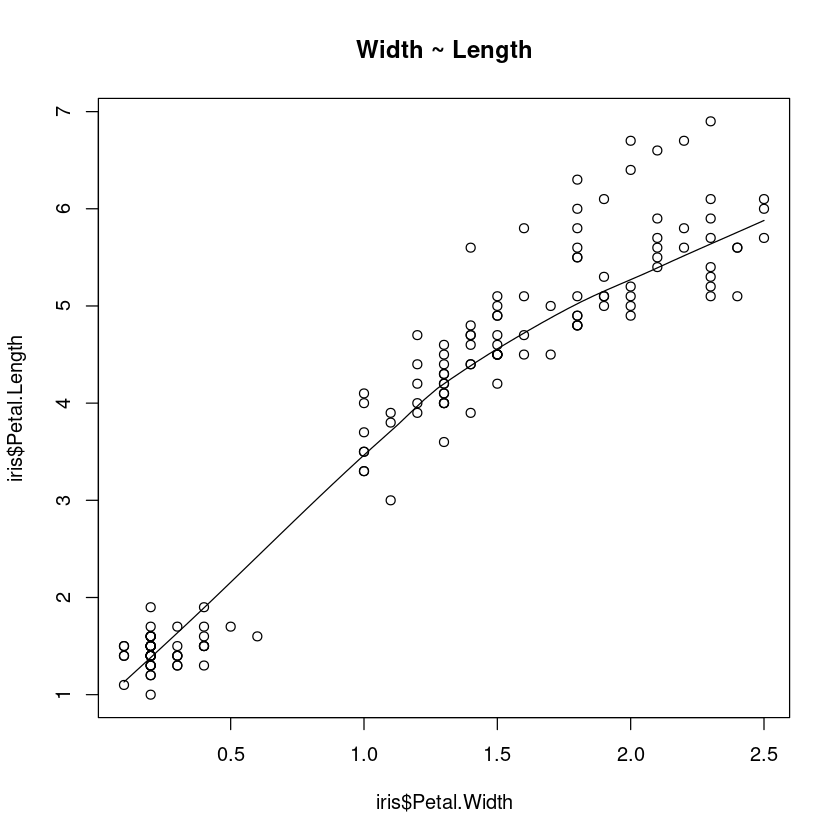

In [2]:
scatter.smooth(x = iris$Petal.Width, y = iris$Petal.Length,
               main = 'Width ~ Length')

In [3]:
library(ggplot2)

`geom_smooth()` using formula 'y ~ x'



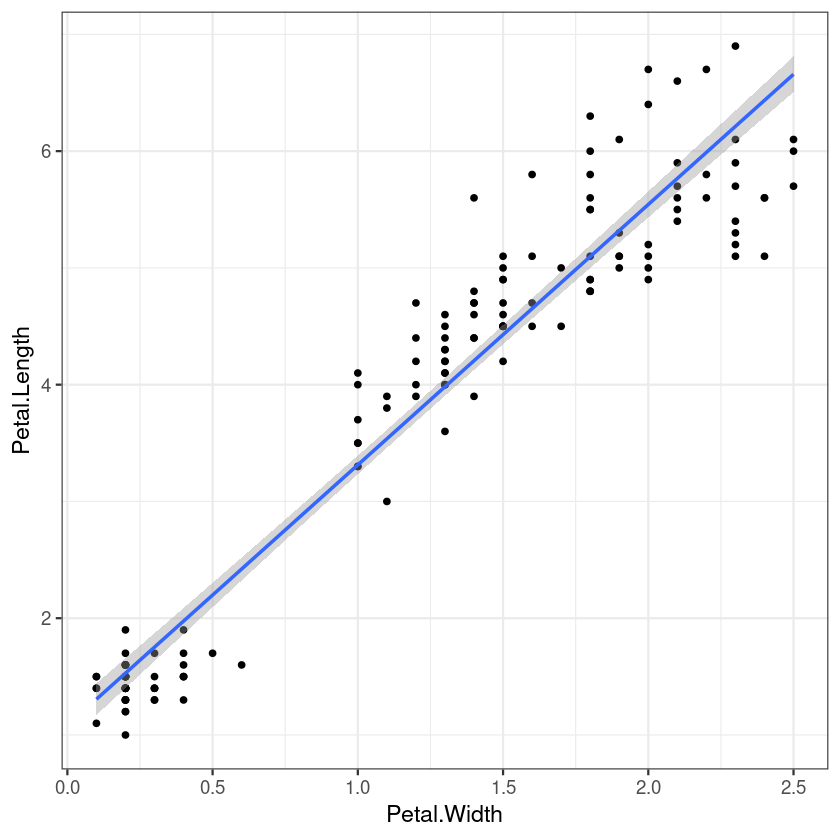

In [4]:
plot = ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length)) +
       geom_point() + geom_smooth(method = 'lm') + theme_bw(base_size = 14)

plot

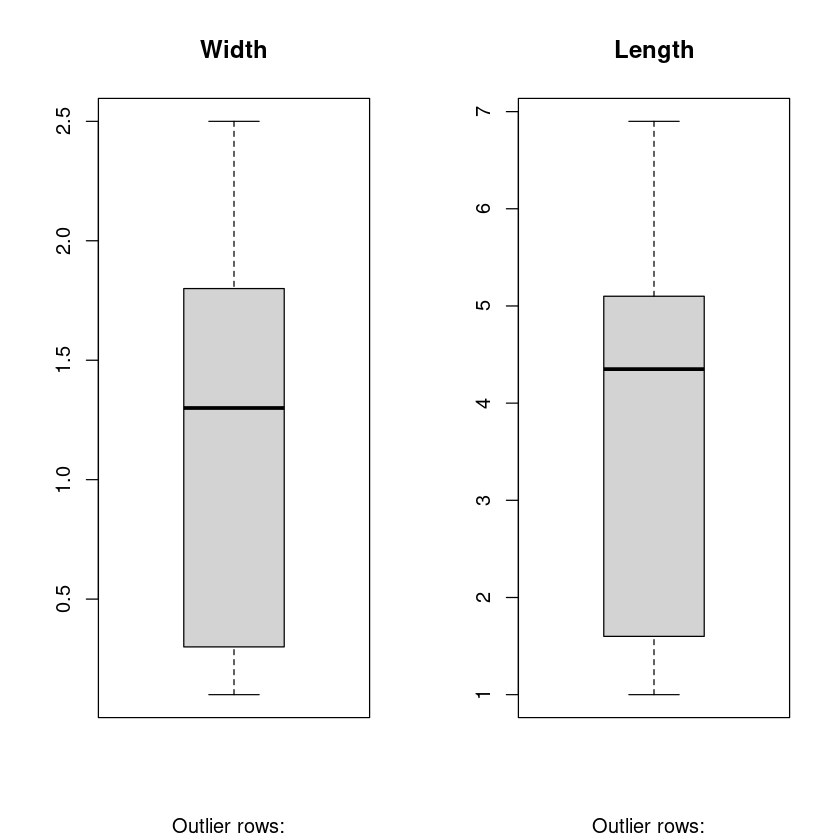

In [5]:
par(mfrow = c(1, 2))
boxplot(iris$Petal.Width, main = 'Width',
        sub = paste("Outlier rows: ", boxplot.stats(iris$Petal.Width)$out))
boxplot(iris$Petal.Length, main = 'Length',
        sub = paste("Outlier rows: ", boxplot.stats(iris$Petal.Length)$out))

In [6]:
cor(iris$Petal.Width, iris$Petal.Length)

[1] 0.9628654

## 1.1. Tạo training data và test data

In [7]:
set.seed(42)

trainingRowIndex = sample(1:nrow(iris), 0.7*nrow(iris))
trainingRowIndex

[1]  49  65  74 146 122 150 128  47  24  71 100  89 110  20 114 111 131  41
 [19] 139  27 109   5  84  34  92 104   3  58  97  42 142  30  43  15  22 123
 [37]   8  36  68  86  18 130 126  69   4  98  50  99  88  87 145  26   6 105
 [55]   2 124  21  96 115  10  40 129  33 140  73  29  76   9  35  16 107  93
 [73] 120 138  80  55  90  94  57 121  77  13  53  54  32  60  85  17  44  83
 [91]  72 135 118 149  48 136  64  38   1 144  14 132  61  81 103

In [8]:
trainingData = iris[trainingRowIndex,]
head(trainingData)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
49,5.3,3.7,1.5,0.2,setosa
65,5.6,2.9,3.6,1.3,versicolor
74,6.1,2.8,4.7,1.2,versicolor
146,6.7,3.0,5.2,2.3,virginica
122,5.6,2.8,4.9,2.0,virginica
150,5.9,3.0,5.1,1.8,virginica


In [9]:
testData = iris[-trainingRowIndex,]
head(testData)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7,4.6,3.4,1.4,0.3,setosa
11,5.4,3.7,1.5,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
19,5.7,3.8,1.7,0.3,setosa
23,4.6,3.6,1.0,0.2,setosa
25,4.8,3.4,1.9,0.2,setosa


## 1.2. Build model và đánh giá bằng MSE

In [10]:
# dự đoán Length từ Width
lmMod = lm(Petal.Length ~ Petal.Width, data = trainingData)
iPred = predict(lmMod, testData)

In [11]:
mse = mean(lmMod$residuals^2)

mse

[1] 0.2299794

In [12]:
mse_test = mean((testData$Petal.Length - iPred)^2)

mse_test

[1] 0.2171714

## 1.3. Summary

In [13]:
summary(lmMod)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3496 -0.2976  0.0076  0.2329  1.4037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.04175    0.08562   12.17   <2e-16 ***
Petal.Width  2.25325    0.06243   36.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4842 on 103 degrees of freedom
Multiple R-squared:  0.9267,	Adjusted R-squared:  0.926 
F-statistic:  1303 on 1 and 103 DF,  p-value: < 2.2e-16


In [14]:
coef(lmMod)

(Intercept) Petal.Width 
   1.041753    2.253255

In [15]:
# slope
coef(lmMod)['Petal.Width']

Petal.Width 
   2.253255

In [16]:
# intercept
coef(lmMod)['(Intercept)']

(Intercept) 
   1.041753

## 1.4. Predict

In [17]:
# cách 1
x = c(0.9, 1.5, 2.1)
y1 = coef(lmMod)['(Intercept)'] + coef(lmMod)['Petal.Width']*x

y1

[1] 3.069683 4.421636 5.773588

In [18]:
# cách 2
y2 = predict(lmMod, data.frame(Petal.Width = x))

y2

1        2        3 
3.069683 4.421636 5.773588

## 1.5. Visualization

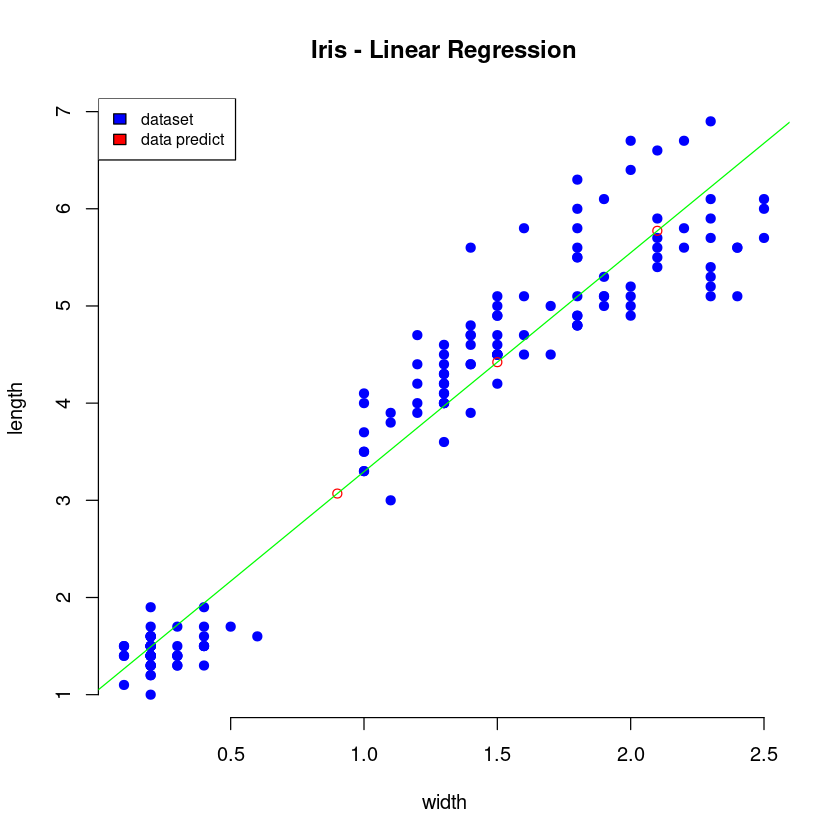

In [19]:
plot(iris$Petal.Width, iris$Petal.Length, main = 'Iris - Linear Regression',
     xlab = 'width', ylab = 'length', pch = 19, frame = FALSE, col = 'blue')
lines(x, y2, col = 'red', type = 'p')
abline(lmMod, iris, col = 'green')

legend('topleft', c('dataset', 'data predict'), cex = 0.8,
       fill = c('blue', 'red'))

# 2. Multiple Linear Regression

In [20]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [21]:
data = mtcars[, c('mpg', 'disp', 'hp', 'wt')]

In [22]:
head(data)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


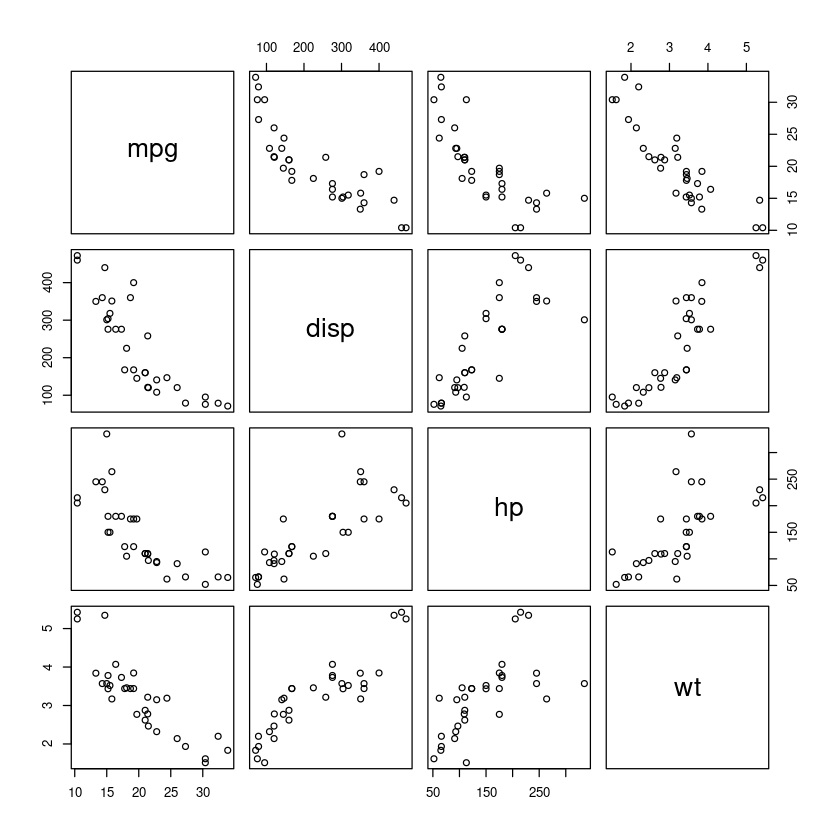

In [23]:
pairs(~mpg + disp + hp + wt, data = data)

In [24]:
cor(data$mpg, data$disp)

[1] -0.8475514

In [25]:
cor(data$mpg, data$hp)

[1] -0.7761684

In [26]:
cor(data$mpg, data$wt)

[1] -0.8676594

[1] 335

[1] 5.424 5.345

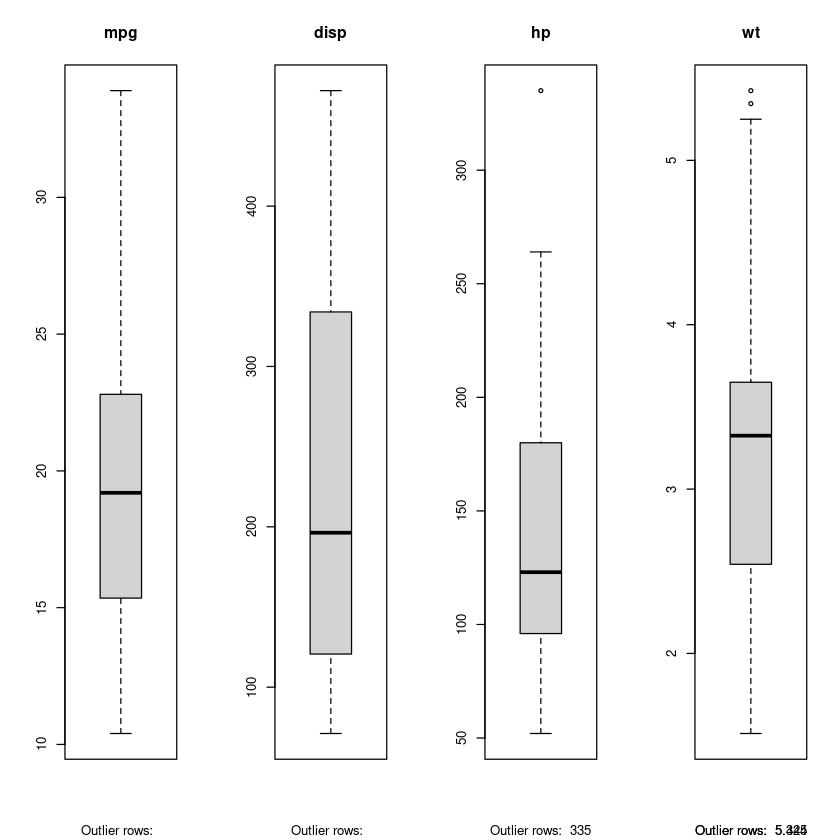

In [32]:
par(mfrow=c(1, 4))
boxplot(data$mpg, main = 'mpg', sub = paste("Outlier rows: ", boxplot.stats(data$mpg)$out))
boxplot(data$disp, main = 'disp', sub = paste("Outlier rows: ", boxplot.stats(data$disp)$out))
boxplot(data$hp, main = 'hp', sub = paste("Outlier rows: ", boxplot.stats(data$hp)$out))
boxplot(data$wt, main = 'wt', sub = paste("Outlier rows: ", boxplot.stats(data$wt)$out))

boxplot.stats(data$hp)$out
boxplot.stats(data$wt)$out

* Loại bỏ outliers

In [33]:
hp_outliers = boxplot.stats(data$hp)$out
hp_outliers

[1] 335

In [34]:
wt_outliers = boxplot.stats(data$wt)$out
wt_outliers

[1] 5.424 5.345

In [36]:
data = data[!(data$hp %in% hp_outliers),]
data = data[!(data$wt %in% wt_outliers),]

In [38]:
nrow(data)

[1] 29

## Train test split

In [39]:
set.seed(42)

trainingRowIndex = sample(1:nrow(data), 0.8*nrow(data))
trainingRowIndex

[1] 17  5  1 25 10  4 18 29 15  7 24 28 14 19 26  2  3  9 12 16 23 20 11

In [41]:
trainingData = data[trainingRowIndex,]
head(trainingData)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Honda Civic,30.4,75.7,52,1.615
Hornet Sportabout,18.7,360.0,175,3.440
Mazda RX4,21.0,160.0,110,2.620
Porsche 914-2,26.0,120.3,91,2.140
Merc 280,19.2,167.6,123,3.440
Hornet 4 Drive,21.4,258.0,110,3.215


In [43]:
testData = data[-trainingRowIndex,]
head(testData)

,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Valiant,18.1,225.0,105,3.460
Merc 240D,24.4,146.7,62,3.190
Merc 450SL,17.3,275.8,180,3.730
AMC Javelin,15.2,304.0,150,3.435
Camaro Z28,13.3,350.0,245,3.840
Ford Pantera L,15.8,351.0,264,3.170


## Build model

In [44]:
lmMod = lm(mpg ~ disp + hp + wt, data = trainingData)
cPred = predict(lmMod, testData)

In [45]:
cPred

Valiant      Merc 240D     Merc 450SL    AMC Javelin     Camaro Z28 
      20.50801       23.15503       15.80794       19.30496       12.78038 
Ford Pantera L 
      15.28860

In [46]:
mse = mean(lmMod$residuals^2)

mse

[1] 4.903524

In [48]:
mse_test = mean((testData$mpg - cPred)^2)

mse_test

[1] 4.492823

## Summary

In [49]:
summary(lmMod)


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5460 -1.2036 -0.3469  1.2579  5.1846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.14944    2.34868  17.520 3.48e-13 ***
disp         0.01320    0.01101   1.199 0.245304    
hp          -0.05281    0.02003  -2.637 0.016260 *  
wt          -5.22157    1.22671  -4.257 0.000427 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.436 on 19 degrees of freedom
Multiple R-squared:  0.859,	Adjusted R-squared:  0.8368 
F-statistic:  38.6 on 3 and 19 DF,  p-value: 2.783e-08


In [51]:
b = coef(lmMod)[1]
mdisp = coef(lmMod)[2]
mhp = coef(lmMod)[3]
mwt = coef(lmMod)[4]

print(b)
print(mdisp)
print(mhp)
print(mwt)

(Intercept) 
   41.14944 
    disp 
0.013202 
         hp 
-0.05281201 
       wt 
-5.221568 


## Dự đoán

In [52]:
# cách 1
x1 = 221 # disp
x2 = 102 # hp
x3 = 2.91 # wt

y = (mdisp * x1 + mhp * x2 + mwt * x3 + b)
y

disp 
23.4855

In [54]:
# cách 2
y1 = predict(lmMod, data.frame(disp = x1, hp = x2, wt = x3))
y1

1 
23.4855

# 3. Model Selection

In [55]:
install.packages('BMA')

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [65]:
library(BMA)

In [61]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [62]:
colnames(mtcars)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [66]:
cols = colnames(mtcars)

yvar = mtcars[, 'mpg']
xvars = mtcars[, cols[-1]]
               
bma = bicreg(xvars, yvar, strict = FALSE, OR = 2)

In [67]:
summary(bma)


Call:
bicreg(x = xvars, y = yvar, strict = FALSE, OR = 2)


  5  models were selected
 Best  5  models (cumulative posterior probability =  1 ): 

           p!=0    EV        SD        model 1    model 2    model 3  
Intercept  100.0  27.211564  13.82229    9.61778   39.68626   37.22727
cyl         37.9  -0.489171   0.71049      .       -1.50779      .    
disp         0.0   0.000000   0.00000      .          .          .    
hp          31.5  -0.008011   0.01373      .          .       -0.03177
drat         0.0   0.000000   0.00000      .          .          .    
wt         100.0  -3.816159   0.93260   -3.91650   -3.19097   -3.87783
qsec        45.2   0.505065   0.59539    1.22589      .          .    
vs           0.0   0.000000   0.00000      .          .          .    
am          28.8   0.845872   1.53016    2.93584      .          .    
gear         0.0   0.000000   0.00000      .          .          .    
carb         0.0   0.000000   0.00000      .          .          .    


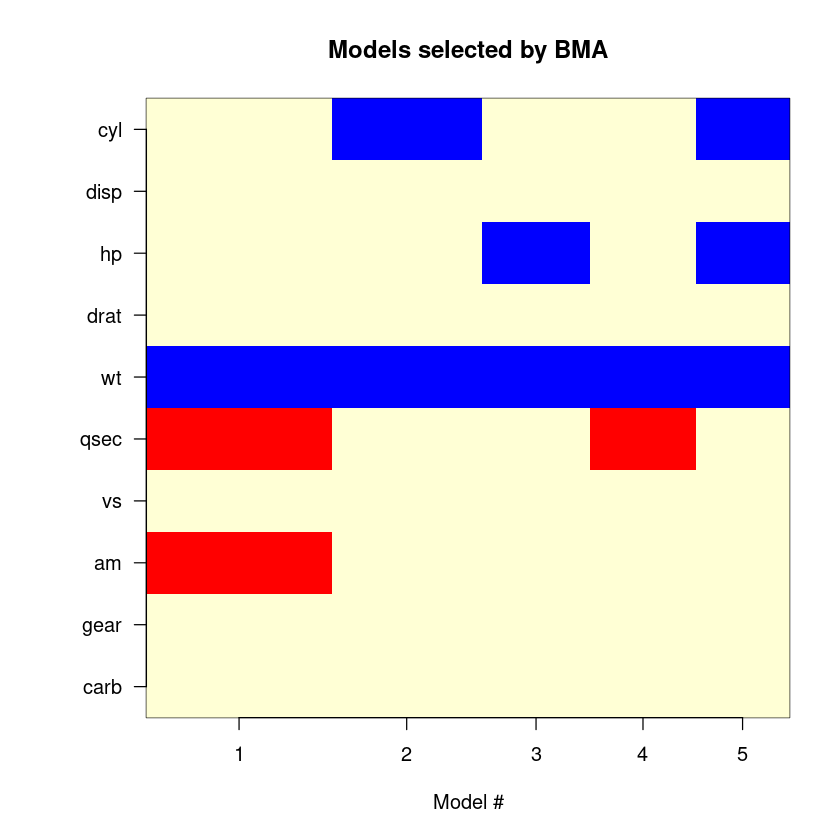

In [68]:
imageplot.bma(bma)

In [69]:
install.packages('relaimpo')

Installing package into ‘/home/manhcuong/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [71]:
library(relaimpo)

In [72]:
m = lm(mpg ~ wt + qsec + am, data = mtcars)

In [73]:
calc.relimp(m, type = 'lmg', rela = T, rank = T)

Response variable: mpg 
Total response variance: 36.3241 
Analysis based on 32 observations 

3 Regressors: 
wt qsec am 
Proportion of variance explained by model: 84.97%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

           lmg
wt   0.5640407
qsec 0.1853428
am   0.2506165

Average coefficients for different model sizes: 

            1X       2Xs       3Xs
wt   -5.344472 -5.200397 -3.916504
qsec  1.412125  1.455534  1.225886
am    7.244939  4.426358  2.935837

In [74]:
m1 = lm(mpg ~ disp + hp + wt, data = mtcars)

In [75]:
calc.relimp(m1, type = 'lmg', rela = T, rank = T)

Response variable: mpg 
Total response variance: 36.3241 
Analysis based on 32 observations 

3 Regressors: 
disp hp wt 
Proportion of variance explained by model: 82.68%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

           lmg
disp 0.3246691
hp   0.2823081
wt   0.3930228

Average coefficients for different model sizes: 

              1X         2Xs           3Xs
disp -0.04121512 -0.02403551 -0.0009370091
hp   -0.06822828 -0.02830651 -0.0311565508
wt   -5.34447157 -3.61432804 -3.8008905826